# Problem 1

In [2]:

import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import statistics 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
bp = pdr.get_data_yahoo(symbols='SPY', start=datetime(2008, 2, 1), end=datetime(2018, 2, 1))

bp.dropna(axis=0, how='all')
Date = bp.index
#print(bp)

re = []
f = 1
mu = 0
for i in range(len(Date)-1,0,-1):
    #day1 = Date[i].date()
    #day1 = Date[i-1].date()
    p1 = bp.iloc[i-1]['Close']
    p2 = bp.iloc[i]['Close']
    re.append((p2-p1)/p1*100)
Date = Date[1:]
n = pd.Series(re)
n.dropna()
df = pd.DataFrame({'Date':Date,'Return':re})

print(df)
#print('standard deviation=',statistics.stdev(re))
#print('average return=',np.average(re))

from arch import arch_model
garch1 = arch_model(n, p=1, q=1)
res = garch1.fit(update_freq=10)
print(res.summary())


           Date    Return
0    2008-02-04 -0.113518
1    2008-02-05  0.049682
2    2008-02-06 -1.025707
3    2008-02-07 -0.662989
4    2008-02-08  1.157783
5    2008-02-11  0.042374
6    2008-02-12 -0.038835
7    2008-02-13  0.212249
8    2008-02-14  0.813094
9    2008-02-15  0.454965
10   2008-02-19 -0.168081
11   2008-02-20  0.953166
12   2008-02-21 -0.341829
13   2008-02-22  0.651897
14   2008-02-25  0.729607
15   2008-02-26 -0.152988
16   2008-02-27  0.226342
17   2008-02-28  0.182869
18   2008-02-29  0.666407
19   2008-03-03  0.421483
20   2008-03-04  0.632516
21   2008-03-05  0.715733
22   2008-03-06 -0.377052
23   2008-03-07  0.205741
24   2008-03-10  0.048656
25   2008-03-11 -0.119625
26   2008-03-12 -0.026152
27   2008-03-13  0.205965
28   2008-03-14 -0.052406
29   2008-03-17 -0.384041
...         ...       ...
2488 2017-12-19 -1.010723
2489 2017-12-20 -1.549558
2490 2017-12-21  0.220762
2491 2017-12-22 -0.935147
2492 2017-12-26  3.593755
2493 2017-12-27 -1.318331
2494 2017-12

# Problem 2

In [3]:
#normal distribution
fixed_res = garch1.fix([0.0799, 0.0170, 0.02,0.98])
print(fixed_res.summary())

                         Constant Mean - GARCH Model Results                         
Dep. Variable:                          None   R-squared:                          --
Mean Model:                    Constant Mean   Adj. R-squared:                     --
Vol Model:                             GARCH   Log-Likelihood:               -3770.93
Distribution:                         Normal   AIC:                           7549.86
Method:            User-specified Parameters   BIC:                           7573.18
                                               No. Observations:                 2518
Date:                       Wed, Feb 14 2018                                         
Time:                               22:47:59                                         
      Mean Model     
                 coef
---------------------
mu             0.0799
   Volatility Model  
                 coef
---------------------
omega          0.0170
alpha[1]       0.0200
beta[1]        0.9800

Resul

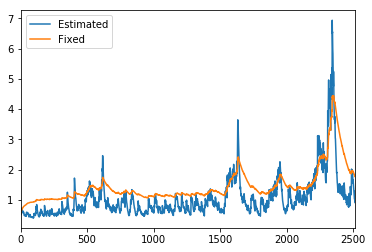

In [4]:
import pandas as pd
%matplotlib inline
df = pd.concat([res.conditional_volatility,fixed_res.conditional_volatility],1)
df.columns = ['Estimated', 'Fixed']
df.plot()



In [15]:
# Student T with my alpha
tgm = arch_model(n, p=1, o=1, q=1, power=1.0, dist='StudentsT')
tres = tgm.fit(update_freq=5)
print(tres.summary())

Iteration:      5,   Func. Count:     55,   Neg. LLF: 3289.8117303062063
Iteration:     10,   Func. Count:     97,   Neg. LLF: 3263.58003646495
Iteration:     15,   Func. Count:    153,   Neg. LLF: 3263.5299335200507
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 3263.529931094863
            Iterations: 22
            Function evaluations: 192
            Gradient evaluations: 18
                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                         None   R-squared:                      -0.003
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.003
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -3263.53
Distribution:      Standardized Student's t   AIC:                           6539.06
Method:                  Maximum Likelihood   BIC:                           6574.05
                                              No. Obs

/Users/zhousq/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [16]:
tfixed_res = tgm.fix([0.1106,0.0235,0.1799,-0.1607,0.98,7.0057])
print(tfixed_res.summary())

                      Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                          None   R-squared:                          --
Mean Model:                    Constant Mean   Adj. R-squared:                     --
Vol Model:                       TARCH/ZARCH   Log-Likelihood:               -5758.80
Distribution:       Standardized Student's t   AIC:                           11529.6
Method:            User-specified Parameters   BIC:                           11564.6
                                               No. Observations:                 2518
Date:                       Wed, Feb 14 2018                                         
Time:                               14:57:04                                         
      Mean Model     
                 coef
---------------------
mu             0.1106
   Volatility Model  
                 coef
---------------------
omega          0.0235
alpha[1]       0.1799
gamma[1]      -0.1607
beta[1

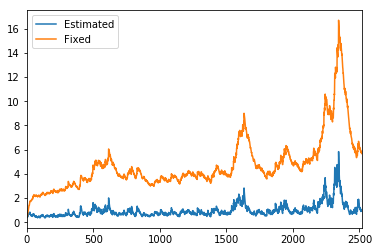

In [17]:
import pandas as pd
%matplotlib inline
df = pd.concat([tres.conditional_volatility,tfixed_res.conditional_volatility],1)

df.columns = ['Estimated', 'Fixed']
df.plot()